In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


# step1 import libraries


In [62]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O
import matplotlib.pyplot as plt #data visulization
import seaborn as sns #statistical data visulization
%matplotlib inline

In [63]:
!pip install category_encoders
!pip install graphviz


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree

import warnings

warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

# step2 Reading data

In [65]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [66]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# step3 Data Processing


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Observation
All are object-Encoding is requried.
No Null Values.

In [68]:
df.shape

(1727, 7)

In [69]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
['med' 'high' 'low']
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


# class balanced or not?

In [70]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

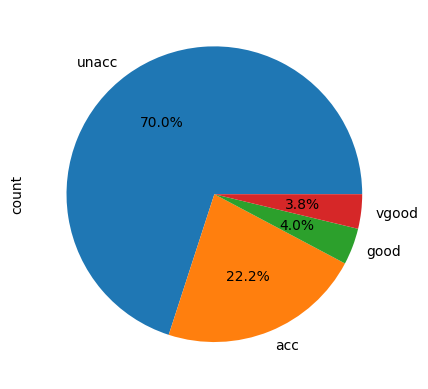

In [71]:
df['class'].value_counts().plot(kind = "pie", autopct='%1.1f%%')

# observation
- class is imbalance-need to balance.

In [72]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [73]:
X = df.drop(['class'], axis=1)
y = df['class']

# Encoding Data

In [74]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)

In [75]:
le= LabelEncoder()
y_en = le.fit_transform(y)

# Split the data trainig  and testing.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.33, random_state = 42)

In [77]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [78]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)

print("model accuracy score with criterion gini index: {0:0.4f}". format(accuracy_score(y_test, y_pred_gini)))

model accuracy score with criterion gini index: 0.8053


In [79]:
cm = confusion_matrix(y_test, y_pred_gini)

print('confusion matrix\n\n', cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [80]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

# creating a dataframe for a array-formatted confusion

In [81]:
cm_df = pd.DataFrame(cm,index =classes_name,columns = classes_name)
cm_df
                

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


In [82]:
cm_df = pd.DataFrame(cm,index =classes_name,columns = classes_name)
cm_df
                                    

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


In [83]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['class'], axis=1)

y = df['class']
ran=RandomUnderSampler()

X_rs,y_rs= ran.fit_resample(X,y)

In [85]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X_rs)

In [86]:
le= LabelEncoder()
y_en = le.fit_transform(y_rs)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.33, random_state = 42)

In [88]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [89]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)

print("model accuracy score with criterion gini index: {0:0.4f}". format(accuracy_score(y_test, y_pred_gini)))

model accuracy score with criterion gini index: 0.7093


In [90]:
cm = confusion_matrix(y_test, y_pred_gini)

print('confusion matrix\n\n', cm)

confusion matrix

 [[ 8  5  0  4]
 [ 0 16  0 11]
 [ 4  0 16  1]
 [ 0  0  0 21]]


In [91]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [92]:
cm_df = pd.DataFrame(cm,index =classes_name,columns = classes_name)
cm_df
                

,acc,good,unacc,vgood
acc,8,5,0,4
good,0,16,0,11
unacc,4,0,16,1
vgood,0,0,0,21


<Axes: >

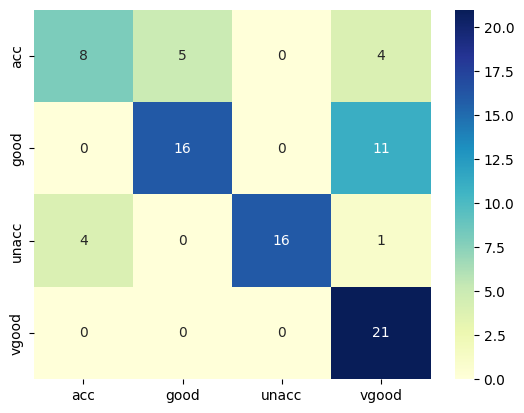

In [93]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

In [94]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        17
           1       0.76      0.59      0.67        27
           2       1.00      0.76      0.86        21
           3       0.57      1.00      0.72        21

    accuracy                           0.71        86
   macro avg       0.75      0.71      0.70        86
weighted avg       0.75      0.71      0.71        86



In [95]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['class'], axis=1)

y = df['class']
ran=RandomOverSampler()

X_rs,y_rs= ran.fit_resample(X,y)

In [96]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X_rs)

In [97]:
le= LabelEncoder()
y_en = le.fit_transform(y_rs)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.33, random_state = 42)

In [99]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [100]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)

print("model accuracy score with criterion gini index: {0:0.4f}". format(accuracy_score(y_test, y_pred_gini)))

model accuracy score with criterion gini index: 0.6610


In [101]:
cm = confusion_matrix(y_test, y_pred_gini)

print('confusion matrix\n\n', cm)

confusion matrix

 [[181 139   0  83]
 [  0 212   0 167]
 [ 74  40 262  38]
 [  0   0   0 400]]


In [102]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [103]:
cm_df = pd.DataFrame(cm,index =classes_name,columns = classes_name)
cm_df
          

,acc,good,unacc,vgood
acc,181,139,0,83
good,0,212,0,167
unacc,74,40,262,38
vgood,0,0,0,400


<Axes: >

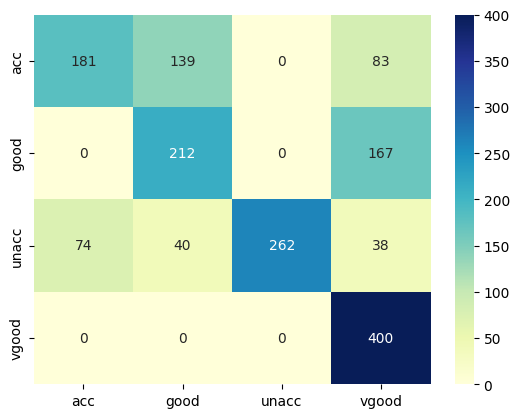

In [104]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

In [105]:
from imblearn.combine import SMOTEENN
X =df.drop(['class'], axis=1)
y =df['class']
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)

le = LabelEncoder()
y_en = le.fit_transform(y)

ran=SMOTEENN()

X_rs,y_rs= ran.fit_resample(X_en,y_en)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.33, random_state = 42)

In [107]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [108]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)

print("model accuracy score with criterion gini index: {0:0.4f}". format(accuracy_score(y_test, y_pred_gini)))

model accuracy score with criterion gini index: 0.8113


In [109]:
cm = confusion_matrix(y_test, y_pred_gini)

print('confusion matrix\n\n', cm)

confusion matrix

 [[250  63   0  36]
 [  0 340   0  31]
 [ 69  20 144  37]
 [  0   0   0 367]]


In [110]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [111]:
cm_df = pd.DataFrame(cm,index =classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,250,63,0,36
good,0,340,0,31
unacc,69,20,144,37
vgood,0,0,0,367


<Axes: >

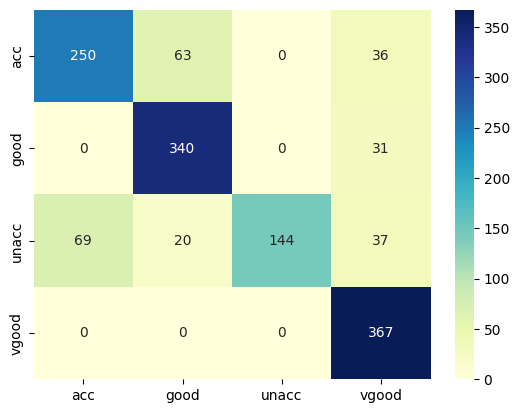

In [112]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

[Text(0.4230769230769231, 0.875, 'x[0] <= 2.5\ngini = 0.745\nsamples = 2754\nvalue = [659, 750, 538, 807]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 1.5\ngini = 0.5\nsamples = 723\nvalue = [367, 0, 356, 0]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 166\nvalue = [0, 0, 166, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 1.5\ngini = 0.45\nsamples = 557\nvalue = [367, 0, 190, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 88\nvalue = [0, 0, 88, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.34\nsamples = 469\nvalue = [367, 0, 102, 0]'),
 Text(0.6923076923076923, 0.625, 'x[5] <= 1.5\ngini = 0.677\nsamples = 2031\nvalue = [292, 750, 182, 807]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 2.5\ngini = 0.477\nsamples = 630\nvalue = [183, 416, 31, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.287\nsamples = 144\nvalue = [119, 0, 25, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.25\nsamples = 486\nvalue = [64, 416, 6, 0]'),
 Text(0.8461538461538461, 

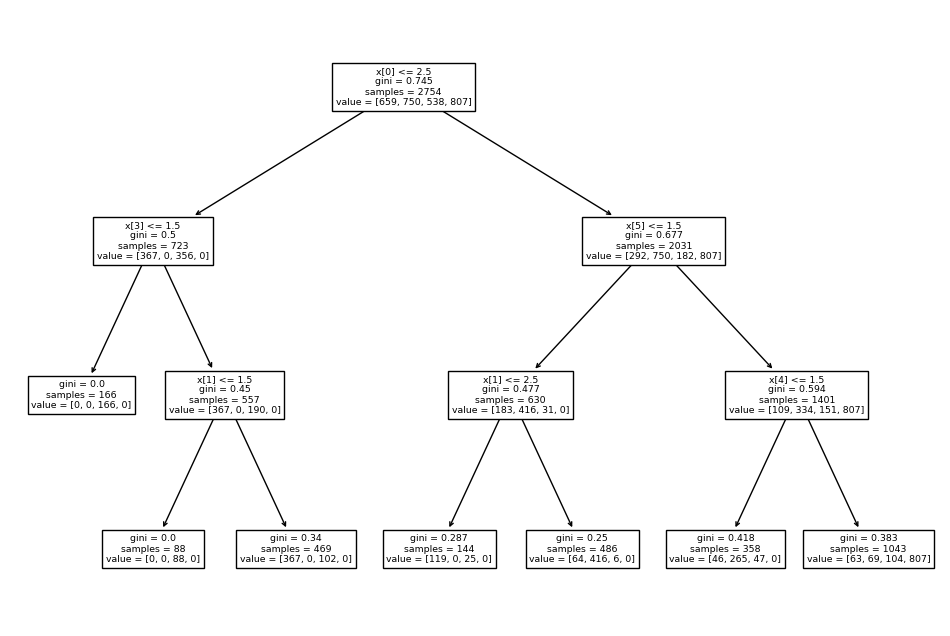

In [113]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

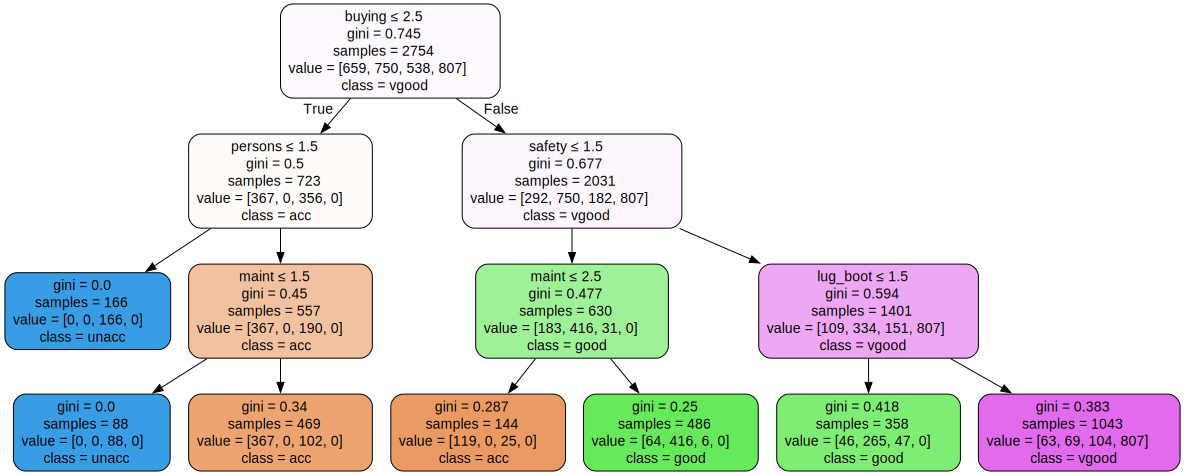

In [114]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None,feature_names=X_train.columns,class_names=classes_name,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Hyper parameter tunning


In [117]:
from sklearn.model_selection import GridSearchCV


#Create the parameter grid based on the results of random search

params= {

'max_depth': [2, 3, 5, 6,8,10, 20],

'min_samples_leaf': [5, 10, 20, 50, 180],

'criterion': ["gini", "entropy"]
}

In [121]:
grid_search = GridSearchCV(estimator=clf_gini,param_grid=params,
cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [122]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 180]},
             scoring='accuracy', verbose=1)

In [136]:
len (X_train)

2754

In [124]:
best_par = grid_search.best_estimator_

In [134]:
def evaluate_model(dt_classifier):



    print("Train Accuracy:",accuracy_score(y_train, dt_classifier.predict(X_train)))

    print("Train Confusion Matrix:")

    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))

    print("-"*50)

    print("Test Accuracy:",accuracy_score(y_test, dt_classifier.predict(X_test)))

    print("Test Confusion Matrix:")

    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    cm_df = pd.DataFrame(cm, index = classes_name,columns = classes_name)
    
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
    print(classification_report(y_test, dt_classifier.predict(X_test)))

Train Accuracy: 0.9865649963689179
Train Confusion Matrix:
[[651   1   2   5]
 [  7 743   0   0]
 [ 17   5 516   0]
 [  0   0   0 807]]
--------------------------------------------------
Test Accuracy: 0.9808400884303611
Test Confusion Matrix:
[[340   2   0   7]
 [  2 369   0   0]
 [ 12   3 255   0]
 [  0   0   0 367]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       349
           1       0.99      0.99      0.99       371
           2       1.00      0.94      0.97       270
           3       0.98      1.00      0.99       367

    accuracy                           0.98      1357
   macro avg       0.98      0.98      0.98      1357
weighted avg       0.98      0.98      0.98      1357



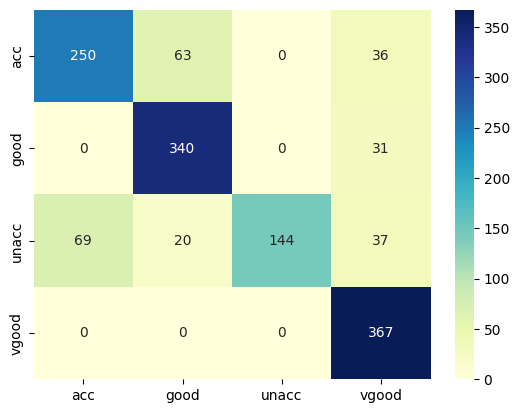

In [135]:
evaluate_model(best_par)

In [ ]:
# model save and deployment

In [137]:
best_par.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=0)

In [138]:
print("Test Accuracy :", accuracy_score(y_test, best_par.predict(X_test)))

Test Accuracy : 0.9808400884303611


In [139]:
import joblib

#save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(best_par, filename)

['finalized_model.joblib']

In [140]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib